In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
import os
import terra
import meerkat as mk
from domino.data.visual_genome import read_vg, ATTRIBUTE_GROUPS
import numpy as np
import pandas as pd
from rich import print
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(1,'/pd/maya/domino/domino')

In [77]:
from domino.evaluate import run_sdms, run_sdm, score_sdm_explanations, score_sdms
import meerkat.contrib.mimic.gcs

from plot import PALETTE, coherence_metric, EMB_PALETTE, generate_group_df

### Plots: Section 5.2 - Embeddings

In [76]:
df_synthetic_corr = generate_group_df(40598, 45159, "correlation")
df_synthetic_rare = generate_group_df(57203, 58676, "rare")
df_synthetic_nl = generate_group_df(63176, 64524, "noisy_label")

df = pd.concat([df_synthetic_corr, df_synthetic_rare, df_synthetic_nl])
df.head()

/pd/maya/domino/domino/plot.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if(slice_type=="correlation"): grouped_df = grouped_df[grouped_df['alpha'] != 0.0]
/pd/maya/domino/domino/plot.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return(grouped_df)
/pd/maya/domino/domino/plot.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,...,target_name,slice_name,index,config/sdm,alpha,sdm_class,emb_type,success,slice_type,score_model_run_id
5311,41210,1,0,0.830594,0.6,0.56,0.52,0.038674,0.071823,0.151934,...,atelectasis,atelectasis=0_cardio_group=1,5311,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,domino.sdm.gmm.MixtureModelSDM,bit,False,correlation,NaN
5373,41216,3,0,0.836570,0.9,0.80,0.59,0.052486,0.081492,0.140884,...,atelectasis,atelectasis=0_cardio_group=1,5373,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,domino.sdm.gmm.MixtureModelSDM,clip,False,correlation,NaN
5254,41204,4,0,0.786897,0.6,0.48,0.43,0.034530,0.059392,0.124309,...,atelectasis,atelectasis=0_cardio_group=1,5254,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,domino.sdm.gmm.MixtureModelSDM,imagenet,False,correlation,NaN
5394,41218,4,0,0.855332,0.9,0.56,0.58,0.041436,0.080110,0.149171,...,atelectasis,atelectasis=0_cardio_group=1,5394,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,domino.sdm.gmm.MixtureModelSDM,mimic_imageonly,True,correlation,NaN
5333,41212,3,0,0.797306,1.0,0.84,0.74,0.053867,0.102210,0.171271,...,atelectasis,atelectasis=0_cardio_group=1,5333,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,domino.sdm.gmm.MixtureModelSDM,mimic_multimodal,False,correlation,NaN


(0.0, 1.0)

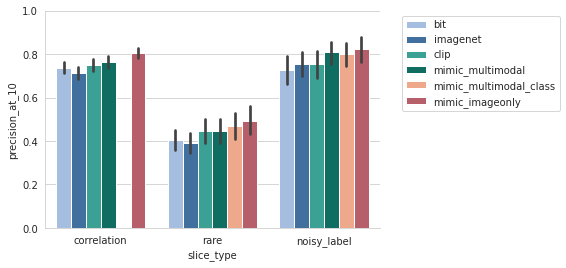

In [82]:
sns.barplot(
    data=df[df["sdm_class"] == "domino.sdm.gmm.MixtureModelSDM"],
    y="precision_at_10",
    x="slice_type",
    hue="emb_type",
    hue_order=EMB_PALETTE.keys(),
    palette=sns.color_palette(EMB_PALETTE.values(), 6)
)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim([0,1])
#plt.savefig("figures/08-01_bar.pdf")